In [1]:
import numpy as np
import scipy.interpolate as interp

def interpolate_polyline(polyline, num_points):
    duplicates = []
    for i in range(1, len(polyline)):
        if np.allclose(polyline[i], polyline[i-1]):
            duplicates.append(i)
    if duplicates:
        polyline = np.delete(polyline, duplicates, axis=0)
    tck, u = interp.splprep(polyline.T, s=0)
    u = np.linspace(0.0, 1.0, num_points)
    return np.column_stack(interp.splev(u, tck))

In [1]:
import numpy as np
import pandas as pd 
import gmplot
from pyproj import Proj, transform
import matplotlib.pyplot as plt
from geographiclib.geodesic import Geodesic

In [6]:
interpolate_polyline(np.array([54.72534491306931, 55.94083790905259, 54.72534489661149, 55.94083741111973]), 2)

ValueError: not enough values to unpack (expected 2, got 1)

In [1]:
import pandas as pd 

In [19]:
df = pd.read_csv('out.csv')
df 

,frame,id,x,y,lat,long,class,speed,lane,azimuth
0,2,0,810,432,54.725260,55.940512,car,44.292206,4,15.561704
1,2,1,1250,656,54.725421,55.940728,car,39.667008,2,-167.336440
2,2,2,739,641,54.725256,55.940708,car,33.812618,1,-162.784433
3,2,3,1092,536,54.725376,55.940635,car,46.369826,3,29.197456
4,2,4,1392,519,54.725472,55.940633,car,29.218250,4,57.853177
...,...,...,...,...,...,...,...,...,...,...
978,211,27,1139,481,54.725393,55.940588,car,37.353626,4,22.389017
979,212,27,1127,480,54.725389,55.940587,car,43.220408,4,12.758184
980,213,27,1108,478,54.725382,55.940584,car,69.769470,4,14.619969
981,214,27,1100,475,54.725380,55.940580,car,34.645619,4,34.505721


In [25]:
latlong = df[['lat', 'long']][df['id'] == 2]
list(latlong['lat'])

[54.72525566369869,
 54.725259365688366,
 54.72526215300604,
 54.72526874895505,
 54.72526874895505,
 54.72527155812145,
 54.72527451727057,
 54.7252779856746,
 54.72528079590055,
 54.725284383628754,
 54.72528759779642,
 54.72529519452237,
 54.72529798879831,
 54.72530110425046,
 54.725304315677626,
 54.72530782682813,
 54.72531058772526,
 54.72531398415651,
 54.7253173504997,
 54.72532068715285,
 54.725324071347096,
 54.725327343445386,
 54.72532995370851,
 54.725334402682776,
 54.725337328463546,
 54.725341125090345,
 54.72534426580537,
 54.72534796696306,
 54.72534827122408,
 54.72535438555365,
 54.72535828137797,
 54.725361258035015,
 54.72536449441452,
 54.725367705296506,
 54.72537147191272,
 54.72537433877533,
 54.72537718233465,
 54.72538081391657,
 54.72538387979305,
 54.72538714419619,
 54.72539042499382,
 54.72539335728236,
 54.72539608439449,
 54.72539979728426,
 54.72540162333679,
 54.72540390938868,
 54.72540699801693,
 54.72540933781968,
 54.72541337985707,
 54.72541736

In [26]:
import gmplot
  
latitude_list = list(latlong['lat'])
longitude_list = list(latlong['long'])
  
gmap3 = gmplot.GoogleMapPlotter(54.725351,
                                55.940656, 20)
  
# scatter method of map object 
# scatter points on the google map
gmap3.scatter( latitude_list, longitude_list, '# FF0000',
                              size = 0.1, marker = False )
  
# Plot method Draw a line in
# between given coordinates
gmap3.plot(latitude_list, longitude_list, 
           'cornflowerblue', edge_width = 0.1)
  
gmap3.draw( "E:\yolov5_v2\yolov5\map13.html" )

c:\Users\vital\AppData\Local\Programs\Python\Python310\lib\site-packages\gmplot\color.py:194: UserWarning: Color '# FF0000' isn't supported.
  warnings.warn("Color '%s' isn't supported." % color)


In [24]:
import gmplot
  
latitude_list = [54.725387, 54.725345]
longitude_list = [55.940675, 55.940651]
  
gmap3 = gmplot.GoogleMapPlotter(54.725351,
                                55.940656, 20)
  
# scatter method of map object 
# scatter points on the google map
gmap3.scatter( latitude_list, longitude_list, '# FF0000',
                              size = 0.1, marker = False )
  
# Plot method Draw a line in
# between given coordinates
gmap3.plot(latitude_list, longitude_list, 
           'cornflowerblue', edge_width = 0.1)
  
gmap3.draw( "E:\yolov5_v2\yolov5\map13.html" )

c:\Users\vital\AppData\Local\Programs\Python\Python310\lib\site-packages\gmplot\color.py:194: UserWarning: Color '# FF0000' isn't supported.
  warnings.warn("Color '%s' isn't supported." % color)


In [148]:
df = pd.read_csv('out.csv')
df[df['id'] == 1].to_csv('guru.csv')

In [5]:
from gpx_converter import Converter

Converter(input_file='guru.csv').csv_to_gpx(lats_colname='lat',
                                                 longs_colname='long',
                                                 output_file='your_input.gpx')

True

In [6]:
from pyproj import Proj, transform
print(transform(Proj(init='epsg:3857'), Proj(init='epsg:4326'), 55.940727954043474, 54.72542096557289))  # longitude first, latitude second.
# output (meters east of 0, meters north of 0): (-14314.651244750548, 6711665.883938471)

(0.0005025241092588942, 0.0004916068208264584)


c:\Users\vital\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\vital\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\vital\AppData\Local\Temp\ipykernel_20144\746881272.py:2: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotch

In [7]:
round(55.940746385216976, 6)

55.940746

In [154]:
latlong = df[['lat', 'long']][df['id'] == 3].drop_duplicates()
x = np.array(latlong['lat'])
y = np.array(latlong['long'])
x, y

(array([54.72537594, 54.72537185, 54.72536876, 54.72536321, 54.72535865,
        54.72535511, 54.72535189, 54.72534793, 54.72534496, 54.7253413 ,
        54.72533536, 54.72533125, 54.72532826, 54.72532367, 54.72532021,
        54.72531667, 54.72531322, 54.72530917, 54.72530566, 54.72530178,
        54.72529773, 54.72529526, 54.72529157, 54.72528825, 54.72528409,
        54.72528071, 54.72527753, 54.72527721, 54.72526992, 54.7252662 ,
        54.72526238, 54.72525778, 54.72525376, 54.72524956, 54.72524648,
        54.72524325, 54.72524118, 54.72523717, 54.7252333 ]),
 array([55.94063498, 55.94063446, 55.94063322, 55.94062994, 55.94062848,
        55.94062715, 55.94062498, 55.94062358, 55.94061962, 55.94061823,
        55.94061562, 55.94061415, 55.94061374, 55.94061127, 55.94060986,
        55.94060751, 55.94060702, 55.94060363, 55.94060313, 55.9405978 ,
        55.94059624, 55.94059491, 55.94059339, 55.94059192, 55.94059032,
        55.94058882, 55.94058536, 55.94058631, 55.94058319, 55

In [43]:
df['id'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int64)

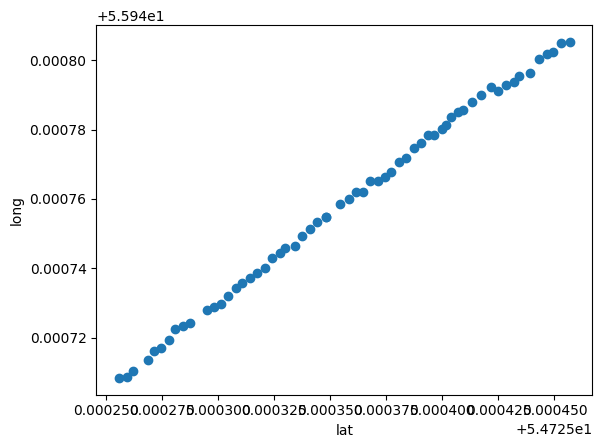

In [150]:
plt.scatter(x, y)
plt.xlabel('lat')
plt.ylabel('long')
plt.show()

In [2]:
from scipy.interpolate import interp1d
from scipy.interpolate import interp2d
from scipy.integrate import quad
from scipy.integrate import solve_ivp

In [24]:
S_f = interp1d(x, y, 'cubic')
S_f

In [55]:
numerator = quad(lambda E: E*S_f(E), min(x), max(x))[0]
denominator = quad(lambda E: S_f(E), min(x), max(x))[0]
E_mean = numerator/denominator
E_mean
len(x)

60

In [155]:
m_f = interp1d(x, y, 'cubic')
dmdt_f = m_f._spline.derivative(nu=1)
t = np.linspace(min(x),max(x),2*len(df[['lat', 'long']][df['id'] == 3]))
m = m_f(t)
dmdt = dmdt_f(t)

In [82]:
def get_bearing(lat1, long1, lat2, long2 ):
    brng = Geodesic.WGS84.Inverse(round(lat1, 7), round(long1, 7), round(lat2, 7), round(long2, 7))['azi1']
    return brng

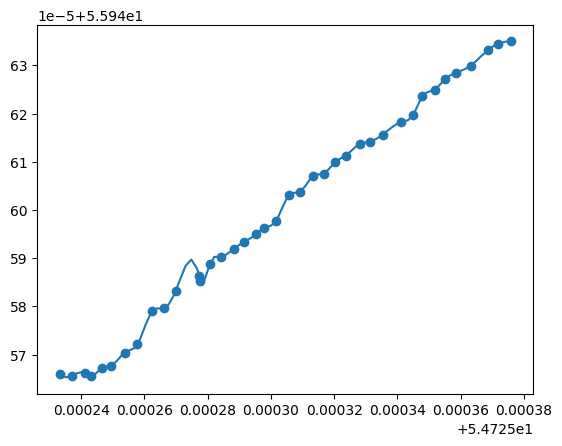

In [156]:
plt.scatter(x, y)
plt.plot(t, m)
# (t, m)

In [157]:
bearing = []
for i in range(len(t)-1):
    bearing.append(get_bearing(t[i], m[i], t[i+1], m[i+1]))
to_pd = []
for i in range(0, len(t)-1, 2):
    to_pd.append(bearing[i])

df[['azimuth']][df['id'] == 3] = pd.DataFrame(to_pd)
df[['azimuth']][df['id'] == 3], len(df[['azimuth']][df['id'] == 3].dropna()), len(to_pd)

C:\Users\vital\AppData\Local\Temp\ipykernel_10088\263657205.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['azimuth']][df['id'] == 3] = pd.DataFrame(to_pd)
C:\Users\vital\AppData\Local\Temp\ipykernel_10088\263657205.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['azimuth']][df['id'] == 3] = pd.DataFrame(to_pd)


(        azimuth
 3     30.062003
 12     8.233469
 21    10.919984
 30    16.140290
 40   180.000000
 49    16.140292
 58     8.233472
 68    21.099753
 77     8.233474
 86    37.658302
 95    16.140299
 103   10.919992
 112   16.140303
 120    0.000000
 128   23.465476
 136    8.233479
 144   21.099770
 152    8.233481
 160   23.465484
 168   10.920000
 176   35.885508
 184   16.140316
 192   10.920003
 200   21.099782
 208    8.233486
 216   16.140321
 224   10.920007
 233   37.658348
 242  -30.062066
 251   13.931323
 260   23.465506
 268    8.233491
 276   45.366972
 284   16.140332
 292   16.140334
 300    8.233494
 308   10.920017
 316    0.000000
 324    0.000000
 332    0.000000,
 40,
 40)

In [42]:
m_f = interp1d(x, y, 'cubic')
dmdt_f = m_f._spline.derivative(nu=1)
t = np.linspace(min(x),max(x),100)
m = m_f(t)
dmdt = dmdt_f(t)

11

In [101]:
df[['lat', 'long']][df['id'] == 2] = df[['lat', 'long']][df['id'] == 2].interpolate(method='polynomial', order=2)
bearing = []
for i in range(len(df[['lat', 'long']][df['id'] == 2])-1):
    bearing.append(get_bearing(float(df[['lat']][df['id'] == 2].iloc[i]), float(df[['long']][df['id'] == 2].iloc[i]), 
                               float(df[['lat']][df['id'] == 2].iloc[i+1]), float(df[['long']][df['id'] == 2].iloc[i+1])))
bearing

C:\Users\vital\AppData\Local\Temp\ipykernel_10088\39358804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['lat', 'long']][df['id'] == 2] = df[['lat', 'long']][df['id'] == 2].interpolate(method='polynomial', order=2)
C:\Users\vital\AppData\Local\Temp\ipykernel_10088\39358804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['lat', 'long']][df['id'] == 2] = df[['lat', 'long']][df['id'] == 2].interpolate(method='polynomial', order=2)


[1.7919860444332354,
 19.362071636253663,
 16.84393186171144,
 180.0,
 24.65724229082553,
 10.183227768561359,
 21.647551096780397,
 32.65212499693862,
 8.233487479938079,
 8.233486754013501,
 16.542122764976888,
 10.538896333004024,
 8.495263980652545,
 21.698680369799774,
 20.82436480927732,
 17.22703092866742,
 14.324418862093065,
 13.405081552654272,
 14.739849051574115,
 25.48501697534355,
 15.179513027697293,
 16.70533118603744,
 6.007432954152742,
 28.31924100294978,
 16.942242503161573,
 19.887418178992426,
 12.352938303664843,
 0.0,
 20.306937286983434,
 10.919987300518244,
 21.099750061446773,
 0.0,
 29.27965010398129,
 0.8726289284766731,
 15.041509992171218,
 13.468696799760114,
 25.74933141967184,
 13.643002134651008,
 27.678448396788323,
 11.885596161280931,
 23.928869510206844,
 0.0,
 15.725910749647765,
 19.47905801378029,
 30.061987963522643,
 16.63257972276026,
 8.586212110153454,
 17.253339337830592,
 17.658168095562512,
 16.140270085863282,
 -11.605925810428355,
 14

In [53]:
float(df[['lat']][df['id'] == 2].iloc[0])

54.72525566369869

In [57]:
df[['lat', 'long']][df['id'] == 2] = df[['lat', 'long']][df['id'] == 2].interpolate(method='polynomial', order=2)
df

C:\Users\vital\AppData\Local\Temp\ipykernel_10088\3977407600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['lat', 'long']][df['id'] == 2] = df[['lat', 'long']][df['id'] == 2].interpolate(method='polynomial', order=2)
C:\Users\vital\AppData\Local\Temp\ipykernel_10088\3977407600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['lat', 'long']][df['id'] == 2] = df[['lat', 'long']][df['id'] == 2].interpolate(method='polynomial', order=2)


,frame,id,x,y,lat,long,class,speed,lane,azimuth
0,2,0,810,432,54.725260,55.940512,car,44.292206,4,16.140330
1,2,1,1250,656,54.725421,55.940728,car,39.667008,2,-163.859728
2,2,2,739,641,54.725256,55.940708,car,33.812618,1,-171.766506
3,2,3,1092,536,54.725376,55.940635,car,46.369826,3,30.062003
4,2,4,1392,519,54.725472,55.940633,car,29.218250,4,70.937569
...,...,...,...,...,...,...,...,...,...,...
995,223,29,1403,511,54.725476,55.940627,car,36.317290,4,60.061864
996,224,27,1006,463,54.725344,55.940562,car,42.426407,4,23.465466
997,224,29,1383,512,54.725470,55.940627,car,60.107877,4,0.000000
998,225,27,997,462,54.725341,55.940561,car,36.754705,4,10.919991


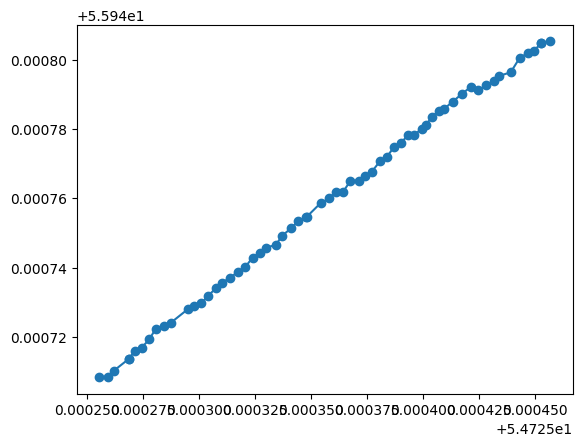

In [87]:
plt.scatter(df[['lat']][df['id'] == 2], df[['long']][df['id'] == 2])
plt.plot(df[['lat']][df['id'] == 2].interpolate(method='nearest', order=2), 
         df[['long']][df['id'] == 2].interpolate(method='nearest', order=2))

In [110]:
data = pd.DataFrame([(0.0, 1, -1.0, 1.0),
                   (1, 2.0, 2, 3),
                   (2.0, 3.0, 4, 9.0),
                   (1, 4.0, -4.0, 16.0)],
                  columns=list('abcd'))
data.interpolate(method='polynomial', order=2) 

,a,b,c,d
0,0.0,1.0,-1.0,1.0
1,1.0,2.0,2.0,3.0
2,2.0,3.0,4.0,9.0
3,1.0,4.0,-4.0,16.0


In [160]:
df = pd.read_csv('out.csv')
df['azimuth'][df['id'] == 3]

3       30.062003
12       8.233469
21      10.919984
30      16.140290
40     180.000000
49      16.140292
58       8.233472
68      21.099753
77       8.233474
86      37.658302
95      16.140299
103     10.919992
112     16.140303
120      0.000000
128     23.465476
136      8.233479
144     21.099770
152      8.233481
160     23.465484
168     10.920000
176     35.885508
184     16.140316
192     10.920003
200     21.099782
208      8.233486
216     16.140321
224     10.920007
233     37.658348
242    -30.062066
251     13.931323
260     23.465506
268      8.233491
276     45.366972
284     16.140332
292     16.140334
300      8.233494
308     10.920017
316      0.000000
324      0.000000
332      0.000000
Name: azimuth, dtype: float64